Importing the libraries

In [ ]:
%%capture
!pip install yfinance
import yfinance as yf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
%matplotlib inline

Loading the training set

In [ ]:
stock = 'RELIANCE' #Enter name of any stock
ticker1 = yf.download(stock+'.NS')
ticker = ticker1.drop(['Adj Close'],axis=1)
# print(ticker.head())

[*********************100%***********************]  1 of 1 completed


Plotting the closing values

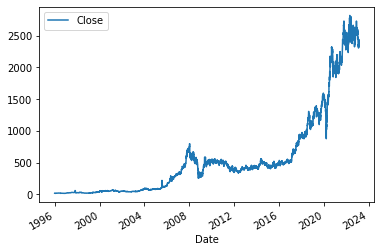

In [ ]:
ticker.plot.line(y='Close')

Making the training set from the closing prices of the stock

In [ ]:
train = ticker.iloc[:,3:4].values
print(train)
print(train.shape)

[[  15.91745186]
 [  15.79367065]
 [  15.91358376]
 ...
 [2434.10009766]
 [2378.89990234]
 [2367.5       ]]
(6828, 1)


Normalizing the training Data

In [ ]:
scale = MinMaxScaler(feature_range=(0,1))
scaled_train = scale.fit_transform(train)
# print(scaled_train)

Creating x and y for the training data (the model will look only at the past 60 days of prices for prediction)

In [ ]:
xtrain = []
ytrain = []
train_size = math.floor(len(train)*0.8)  #splitting training and test set in 80:20 ratio
for i in range(60,train_size):
  xtrain.append(scaled_train[i-60:i,0])
  ytrain.append(scaled_train[i,0])
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print(xtrain.shape,ytrain.shape)

(5402, 60) (5402,)


Building the model

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

Fitting the model

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=30,batch_size=64)

Epoch 1/30
85/85 [==============================] - 35s 205ms/step - loss: 9.3075e-04
Epoch 2/30
85/85 [==============================] - 16s 191ms/step - loss: 2.0765e-04
Epoch 3/30
85/85 [==============================] - 16s 192ms/step - loss: 1.8821e-04
Epoch 4/30
85/85 [==============================] - 16s 193ms/step - loss: 1.7836e-04
Epoch 5/30
85/85 [==============================] - 19s 219ms/step - loss: 1.6109e-04
Epoch 6/30
85/85 [==============================] - 17s 198ms/step - loss: 1.4716e-04
Epoch 7/30
85/85 [==============================] - 17s 199ms/step - loss: 1.3470e-04
Epoch 8/30
85/85 [==============================] - 18s 205ms/step - loss: 1.2497e-04
Epoch 9/30
85/85 [==============================] - 17s 196ms/step - loss: 1.0921e-04
Epoch 10/30
85/85 [==============================] - 17s 195ms/step - loss: 1.1310e-04
Epoch 11/30
85/85 [==============================] - 18s 210ms/step - loss: 1.0677e-04
Epoch 12/30
85/85 [==============================] -

Predicting the output

In [ ]:
xtest = []
for i in range(train_size+60,len(ticker)):
  xtest.append(scaled_train[i-60:i,0])
xtest=np.array(xtest)
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predict = model.predict(xtest)
predict = scale.inverse_transform(predict)

41/41 [==============================] - 3s 42ms/step


Plotting the predicted vs actual price

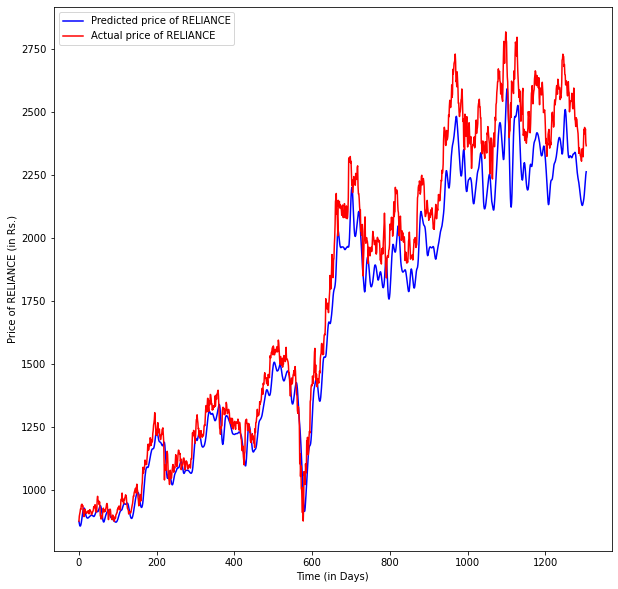

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(predict,color='blue',label='Predicted price of ' + stock)
plt.plot(ticker.iloc[train_size+60:,3:4].values,color='red',label='Actual price of ' + stock)
plt.xlabel('Time (in Days)')
plt.ylabel('Price of ' + stock + ' (in Rs.)')
plt.legend()